<a href="https://colab.research.google.com/github/dhrtjr9/colab_pratice/blob/main/GDP_CARD_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **공통설정**



In [ ]:
pip install impyute #다중대체법을 사용하기 위해서 impyute 라이브러리 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno #결측치를 시각화 하기 위한 함수
import matplotlib.pyplot as plt
import seaborn as sns
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #IterativeImputer 클래스는 아직 실험적이기 때문에 사용하려면 먼저 enable_iterative_imputer 모듈 임포트

#수집된 데이터의 기본 정보들을 확인

(1) Data shape(형태) 확인

(2) Data type 확인

(3) Null값 확인 (※ 빈 값의 Data)

(4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)

# 1.world gdp (1980~2020)

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/woori-numpy/imf-dm-export-20230513.xlsx', index_col = 0)
df1.head(5)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4,4.1,4.2,4.2


In [ ]:
df1.replace('no data', np.nan, inplace = True) #결측치값 NaN으로 변경

In [ ]:
print(df1.isnull().sum()) #컬럼별 결측치 개수확인

1980    59
1981    55
1982    54
1983    54
1984    54
1985    54
1986    53
1987    52
1988    51
1989    51
1990    51
1991    40
1992    37
1993    25
1994    23
1995    21
1996    18
1997    18
1998    15
1999    12
2000    12
2001     5
2002     4
2003     3
2004     3
2005     2
2006     2
2007     2
2008     2
2009     2
2010     2
2011     3
2012     1
2013     1
2014     1
2015     1
2016     1
2017     1
2018     1
2019     1
2020     1
2021     3
2022     3
2023     3
2024     4
2025     5
2026     5
2027     5
2028     5
dtype: int64


<Axes: >

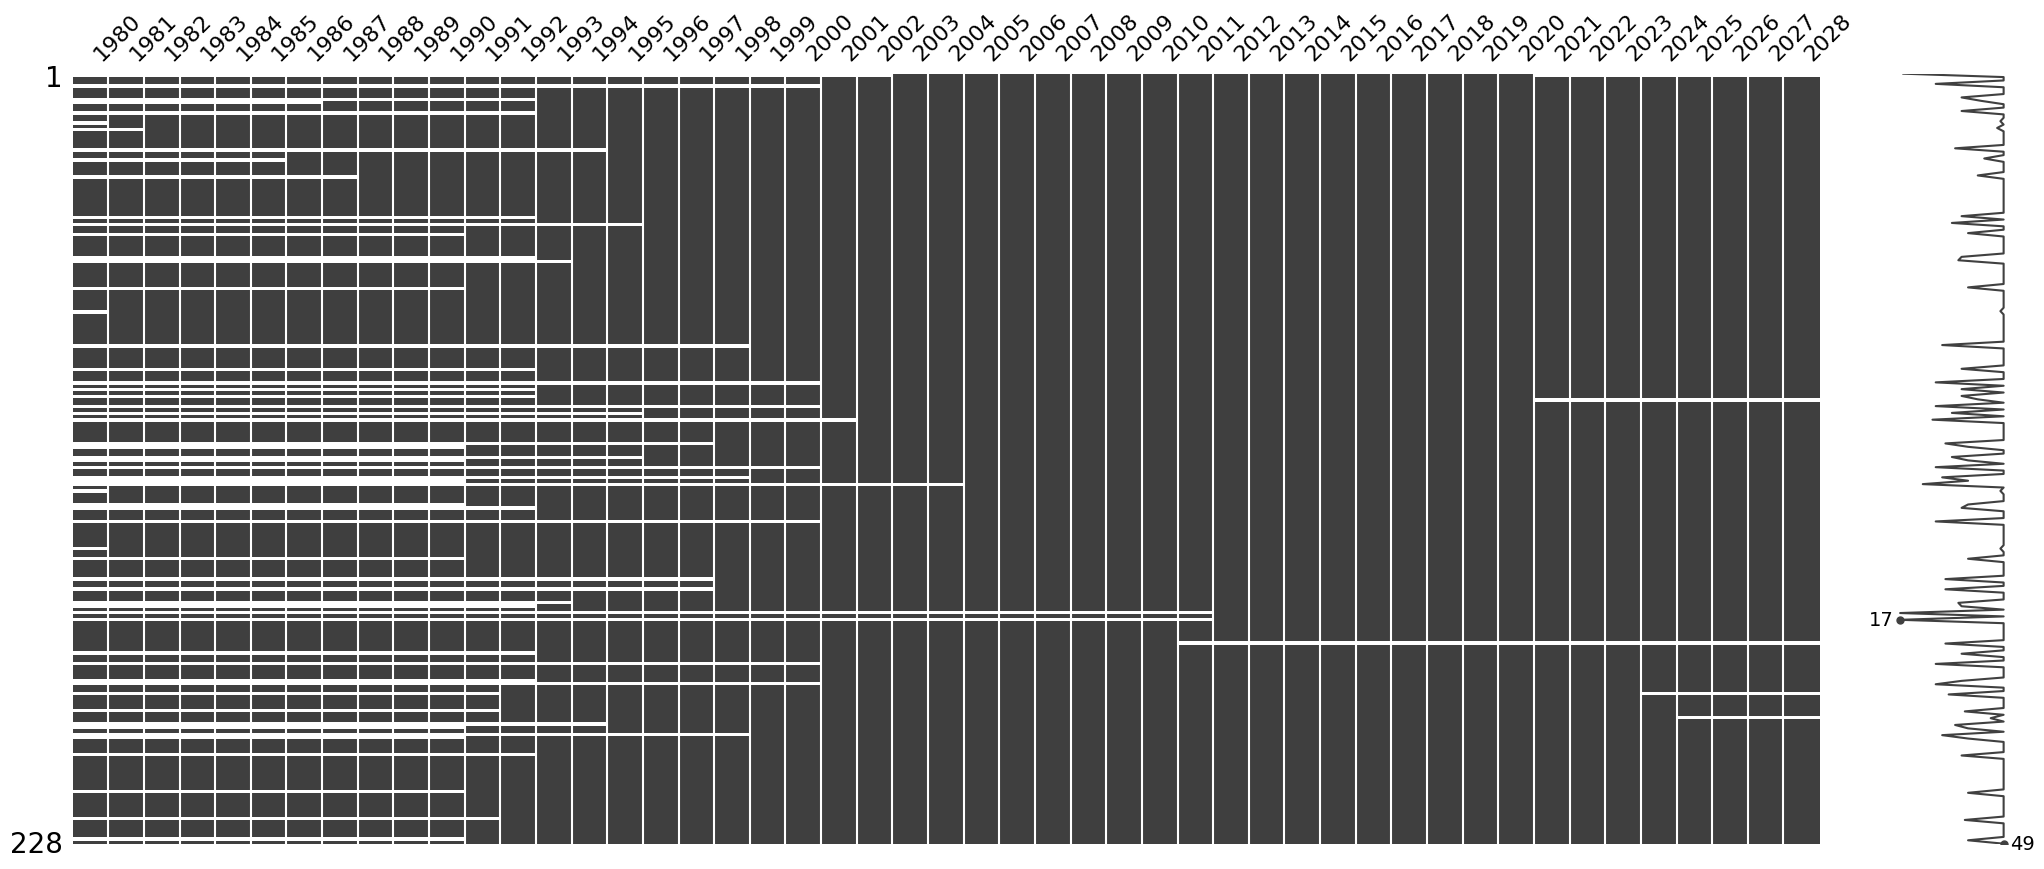

In [ ]:
#결측치 현황 파악
msno.matrix(df1)

In [ ]:
df2 = df1.copy()

In [ ]:
df3 = df1.iloc[:, 2:]

In [ ]:
df2 = df2.iloc[:, :2]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, Afghanistan to World
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1982    174 non-null    float64
 1   1983    174 non-null    float64
 2   1984    174 non-null    float64
 3   1985    174 non-null    float64
 4   1986    175 non-null    float64
 5   1987    176 non-null    float64
 6   1988    177 non-null    float64
 7   1989    177 non-null    float64
 8   1990    177 non-null    float64
 9   1991    188 non-null    float64
 10  1992    191 non-null    float64
 11  1993    203 non-null    float64
 12  1994    205 non-null    float64
 13  1995    207 non-null    float64
 14  1996    210 non-null    float64
 15  1997    210 non-null    float64
 16  1998    213 non-null    float64
 17  1999    216 non-null    float64
 18  2000    216 non-null    float64
 19  2001    223 non-null    float64
 20  2002    224 non-null    float64
 21  2003    225 non-null    float64


In [ ]:
data_impute = round(pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df3)), 3)
data_impute
# # data_impute = IterativeImputer(random_state=83)
# # fir_transform은 imputer를 켜고 변환된 데이터의 값 을 반환합니다 #random_state 사용할 의사 난수 생성기의 시드
# data_impute.columns = df2.columns
# data_impute.head()
# data = df_impute

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.196,1.400,0.051,2.505,2.349,1.778,4.801,3.393,3.942,5.573,...,3.9,-2.4,1.674,3.056,4.958,4.247,3.717,4.777,3.738,3.811
1,2.900,1.100,2.000,-1.500,5.600,-0.800,-1.400,9.800,-10.000,-28.000,...,2.1,-3.5,8.500,3.700,2.200,3.300,3.400,3.400,3.400,3.400
2,6.400,5.400,5.600,5.600,-0.200,-0.700,-1.900,4.800,0.800,-1.200,...,1.0,-5.1,3.400,2.900,2.600,2.600,2.200,2.100,1.700,1.800
3,1.971,2.997,1.655,2.743,4.449,5.509,4.584,7.145,3.802,-2.450,...,2.0,-11.2,8.900,8.700,1.300,1.500,1.500,1.500,1.500,1.500
4,0.000,4.200,6.000,3.500,2.900,4.100,6.100,0.000,-3.500,12.100,...,-0.7,-5.6,1.100,2.800,3.500,3.700,4.000,4.100,4.200,4.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,-0.100,3.300,5.000,3.800,3.000,3.500,4.700,3.800,2.800,1.200,...,1.6,-4.5,5.300,2.300,1.100,1.100,1.700,1.800,1.700,1.600
224,0.400,0.700,0.300,1.200,2.000,-0.100,3.300,4.300,8.700,8.500,...,1.6,-2.7,4.600,5.300,2.900,3.500,3.600,3.600,3.700,3.700
225,2.200,4.000,6.600,4.300,5.500,6.500,5.500,4.600,4.300,3.700,...,2.0,-1.6,5.400,2.600,1.800,2.200,2.300,2.300,2.200,2.300
226,1.904,1.753,3.117,2.418,3.679,3.140,4.208,2.496,0.962,0.200,...,3.3,-1.7,4.800,3.900,3.600,4.200,4.100,4.200,4.300,4.400


In [ ]:
data_impute.index = df2.index

In [ ]:
data_impute.columns = df3.columns

In [ ]:
data_impute

,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.196,1.400,0.051,2.505,2.349,1.778,4.801,3.393,3.942,5.573,...,3.9,-2.4,1.674,3.056,4.958,4.247,3.717,4.777,3.738,3.811
Albania,2.900,1.100,2.000,-1.500,5.600,-0.800,-1.400,9.800,-10.000,-28.000,...,2.1,-3.5,8.500,3.700,2.200,3.300,3.400,3.400,3.400,3.400
Algeria,6.400,5.400,5.600,5.600,-0.200,-0.700,-1.900,4.800,0.800,-1.200,...,1.0,-5.1,3.400,2.900,2.600,2.600,2.200,2.100,1.700,1.800
Andorra,1.971,2.997,1.655,2.743,4.449,5.509,4.584,7.145,3.802,-2.450,...,2.0,-11.2,8.900,8.700,1.300,1.500,1.500,1.500,1.500,1.500
Angola,0.000,4.200,6.000,3.500,2.900,4.100,6.100,0.000,-3.500,12.100,...,-0.7,-5.6,1.100,2.800,3.500,3.700,4.000,4.100,4.200,4.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Major advanced economies (G7),-0.100,3.300,5.000,3.800,3.000,3.500,4.700,3.800,2.800,1.200,...,1.6,-4.5,5.300,2.300,1.100,1.100,1.700,1.800,1.700,1.600
Middle East and Central Asia,0.400,0.700,0.300,1.200,2.000,-0.100,3.300,4.300,8.700,8.500,...,1.6,-2.7,4.600,5.300,2.900,3.500,3.600,3.600,3.700,3.700
Other advanced economies,2.200,4.000,6.600,4.300,5.500,6.500,5.500,4.600,4.300,3.700,...,2.0,-1.6,5.400,2.600,1.800,2.200,2.300,2.300,2.200,2.300


In [ ]:
df2 = df1.iloc[:, :2]

In [ ]:
data_impute1 = pd.concat([df2, data_impute], axis=1)
data_impute1

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,-0.196,1.400,0.051,2.505,2.349,1.778,4.801,3.393,...,3.9,-2.4,1.674,3.056,4.958,4.247,3.717,4.777,3.738,3.811
Albania,2.7,5.7,2.900,1.100,2.000,-1.500,5.600,-0.800,-1.400,9.800,...,2.1,-3.5,8.500,3.700,2.200,3.300,3.400,3.400,3.400,3.400
Algeria,-5.4,3.0,6.400,5.400,5.600,5.600,-0.200,-0.700,-1.900,4.800,...,1.0,-5.1,3.400,2.900,2.600,2.600,2.200,2.100,1.700,1.800
Andorra,NaN,NaN,1.971,2.997,1.655,2.743,4.449,5.509,4.584,7.145,...,2.0,-11.2,8.900,8.700,1.300,1.500,1.500,1.500,1.500,1.500
Angola,2.4,-4.4,0.000,4.200,6.000,3.500,2.900,4.100,6.100,0.000,...,-0.7,-5.6,1.100,2.800,3.500,3.700,4.000,4.100,4.200,4.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Major advanced economies (G7),0.9,2.0,-0.100,3.300,5.000,3.800,3.000,3.500,4.700,3.800,...,1.6,-4.5,5.300,2.300,1.100,1.100,1.700,1.800,1.700,1.600
Middle East and Central Asia,-1.9,-0.2,0.400,0.700,0.300,1.200,2.000,-0.100,3.300,4.300,...,1.6,-2.7,4.600,5.300,2.900,3.500,3.600,3.600,3.700,3.700
Other advanced economies,3.8,4.2,2.200,4.000,6.600,4.300,5.500,6.500,5.500,4.600,...,2.0,-1.6,5.400,2.600,1.800,2.200,2.300,2.300,2.200,2.300


In [ ]:
df1

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,-2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,9.8,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,...,1.0,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5
Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,0.0,...,-0.7,-5.6,1.1,2.8,3.5,3.7,4.0,4.1,4.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Major advanced economies (G7),0.9,2.0,-0.1,3.3,5.0,3.8,3.0,3.5,4.7,3.8,...,1.6,-4.5,5.3,2.3,1.1,1.1,1.7,1.8,1.7,1.6
Middle East and Central Asia,-1.9,-0.2,0.4,0.7,0.3,1.2,2.0,-0.1,3.3,4.3,...,1.6,-2.7,4.6,5.3,2.9,3.5,3.6,3.6,3.7,3.7
Other advanced economies,3.8,4.2,2.2,4.0,6.6,4.3,5.5,6.5,5.5,4.6,...,2.0,-1.6,5.4,2.6,1.8,2.2,2.3,2.3,2.2,2.3


In [ ]:
data_impute1.columns

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
            2024, 2025, 2026, 2027, 2028],
           dtype='int64')

In [ ]:
data_impute1.columns = df1.columns
data_impute1

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,-0.196,1.400,0.051,2.505,2.349,1.778,4.801,3.393,...,3.9,-2.4,1.674,3.056,4.958,4.247,3.717,4.777,3.738,3.811
Albania,2.7,5.7,2.900,1.100,2.000,-1.500,5.600,-0.800,-1.400,9.800,...,2.1,-3.5,8.500,3.700,2.200,3.300,3.400,3.400,3.400,3.400
Algeria,-5.4,3.0,6.400,5.400,5.600,5.600,-0.200,-0.700,-1.900,4.800,...,1.0,-5.1,3.400,2.900,2.600,2.600,2.200,2.100,1.700,1.800
Andorra,NaN,NaN,1.971,2.997,1.655,2.743,4.449,5.509,4.584,7.145,...,2.0,-11.2,8.900,8.700,1.300,1.500,1.500,1.500,1.500,1.500
Angola,2.4,-4.4,0.000,4.200,6.000,3.500,2.900,4.100,6.100,0.000,...,-0.7,-5.6,1.100,2.800,3.500,3.700,4.000,4.100,4.200,4.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Major advanced economies (G7),0.9,2.0,-0.100,3.300,5.000,3.800,3.000,3.500,4.700,3.800,...,1.6,-4.5,5.300,2.300,1.100,1.100,1.700,1.800,1.700,1.600
Middle East and Central Asia,-1.9,-0.2,0.400,0.700,0.300,1.200,2.000,-0.100,3.300,4.300,...,1.6,-2.7,4.600,5.300,2.900,3.500,3.600,3.600,3.700,3.700
Other advanced economies,3.8,4.2,2.200,4.000,6.600,4.300,5.500,6.500,5.500,4.600,...,2.0,-1.6,5.400,2.600,1.800,2.200,2.300,2.300,2.200,2.300


<Axes: >

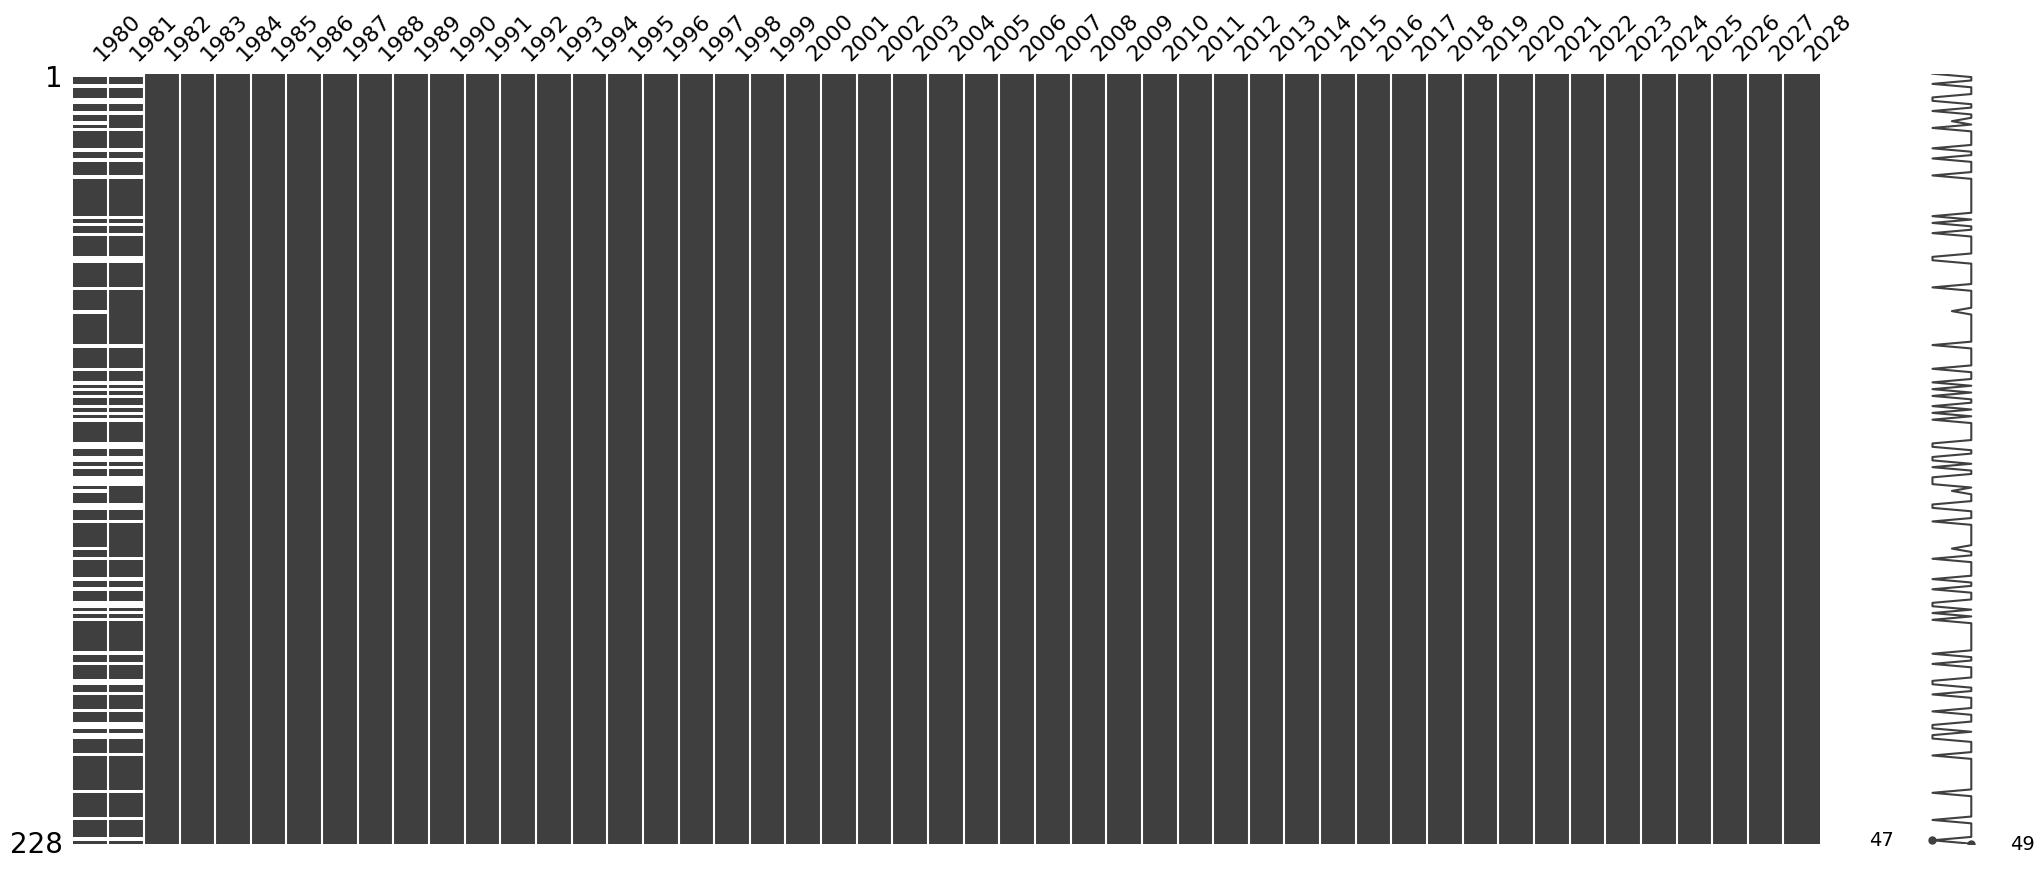

In [ ]:
msno.matrix(data_impute1)

In [ ]:
data_impute1.tail() #결측값을 채운 수정본 중 하위 5개

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Major advanced economies (G7),0.9,2.0,-0.100,3.300,5.000,3.800,3.000,3.50,4.700,3.800,...,1.6,-4.5,5.3,2.3,1.1,1.1,1.7,1.8,1.7,1.6
Middle East and Central Asia,-1.9,-0.2,0.400,0.700,0.300,1.200,2.000,-0.10,3.300,4.300,...,1.6,-2.7,4.6,5.3,2.9,3.5,3.6,3.6,3.7,3.7
Other advanced economies,3.8,4.2,2.200,4.000,6.600,4.300,5.500,6.50,5.500,4.600,...,2.0,-1.6,5.4,2.6,1.8,2.2,2.3,2.3,2.2,2.3
Sub-Saharan Africa,NaN,NaN,1.904,1.753,3.117,2.418,3.679,3.14,4.208,2.496,...,3.3,-1.7,4.8,3.9,3.6,4.2,4.1,4.2,4.3,4.4
World,2.1,1.9,0.700,2.600,4.600,3.600,3.600,3.90,4.700,3.800,...,2.8,-2.8,6.3,3.4,2.8,3.0,3.2,3.2,3.1,3.0


In [ ]:
data_impute1.corr()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
1980,1.000000,0.503415,0.125532,0.019086,0.185742,0.131726,0.176067,0.154446,0.209870,-0.072850,...,0.121075,-0.098262,0.172373,-0.025575,-0.015691,-0.029484,0.060204,-0.024947,0.049333,0.048578
1981,0.503415,1.000000,0.239354,0.093173,0.281905,0.180871,0.213498,0.234757,0.130421,-0.053060,...,0.124102,0.069484,-0.084895,0.063719,-0.052715,0.002940,0.037046,0.023820,0.076942,0.080264
1982,0.125532,0.239354,1.000000,0.171879,-0.281467,-0.004064,0.077504,-0.128274,0.343137,0.341041,...,0.181810,0.238090,-0.114822,0.165970,-0.444202,-0.225130,0.006737,-0.048772,0.052862,0.053887
1983,0.019086,0.093173,0.171879,1.000000,0.469037,0.426801,0.092755,0.397672,-0.079326,-0.095706,...,0.105712,-0.188041,0.063662,-0.335567,0.215518,-0.045143,0.073076,-0.162479,-0.119985,-0.105795
1984,0.185742,0.281905,-0.281467,0.469037,1.000000,0.461110,0.177881,0.367497,-0.243868,-0.303326,...,-0.071433,-0.302708,0.124470,-0.299328,0.452527,0.135207,0.028845,-0.072494,-0.146506,-0.141352
1985,0.131726,0.180871,-0.004064,0.426801,0.461110,1.000000,0.064560,0.193017,-0.030011,-0.212996,...,-0.006178,-0.194414,0.133935,-0.201756,0.312049,0.118253,0.038013,-0.015929,-0.015147,-0.010000
1986,0.176067,0.213498,0.077504,0.092755,0.177881,0.064560,1.000000,0.343244,0.271677,0.095674,...,0.177503,-0.048866,0.029842,0.134461,-0.117617,-0.058538,0.031797,-0.037012,-0.023692,-0.020561
1987,0.154446,0.234757,-0.128274,0.397672,0.367497,0.193017,0.343244,1.000000,0.091562,-0.116314,...,0.032832,-0.199664,0.195425,-0.098474,0.206350,0.048087,0.023296,-0.029663,0.049624,0.049163
1988,0.209870,0.130421,0.343137,-0.079326,-0.243868,-0.030011,0.271677,0.091562,1.000000,0.477121,...,0.082484,0.045468,-0.089356,0.189158,-0.344787,-0.197842,0.017473,-0.046121,0.102530,0.087427
1989,-0.072850,-0.053060,0.341041,-0.095706,-0.303326,-0.212996,0.095674,-0.116314,0.477121,1.000000,...,0.253138,0.191975,-0.117728,0.306747,-0.513195,-0.272306,-0.075122,-0.066775,0.016708,0.009914


In [ ]:
data_impute1.fillna(data_impute1.mode(axis=0)) #최빈값 구하기

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,-0.196,1.400,0.051,2.505,2.349,1.778,4.801,3.393,...,3.9,-2.4,1.674,3.056,4.958,4.247,3.717,4.777,3.738,3.811
Albania,2.7,5.7,2.900,1.100,2.000,-1.500,5.600,-0.800,-1.400,9.800,...,2.1,-3.5,8.500,3.700,2.200,3.300,3.400,3.400,3.400,3.400
Algeria,-5.4,3.0,6.400,5.400,5.600,5.600,-0.200,-0.700,-1.900,4.800,...,1.0,-5.1,3.400,2.900,2.600,2.600,2.200,2.100,1.700,1.800
Andorra,NaN,NaN,1.971,2.997,1.655,2.743,4.449,5.509,4.584,7.145,...,2.0,-11.2,8.900,8.700,1.300,1.500,1.500,1.500,1.500,1.500
Angola,2.4,-4.4,0.000,4.200,6.000,3.500,2.900,4.100,6.100,0.000,...,-0.7,-5.6,1.100,2.800,3.500,3.700,4.000,4.100,4.200,4.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Major advanced economies (G7),0.9,2.0,-0.100,3.300,5.000,3.800,3.000,3.500,4.700,3.800,...,1.6,-4.5,5.300,2.300,1.100,1.100,1.700,1.800,1.700,1.600
Middle East and Central Asia,-1.9,-0.2,0.400,0.700,0.300,1.200,2.000,-0.100,3.300,4.300,...,1.6,-2.7,4.600,5.300,2.900,3.500,3.600,3.600,3.700,3.700
Other advanced economies,3.8,4.2,2.200,4.000,6.600,4.300,5.500,6.500,5.500,4.600,...,2.0,-1.6,5.400,2.600,1.800,2.200,2.300,2.300,2.200,2.300


<Axes: >

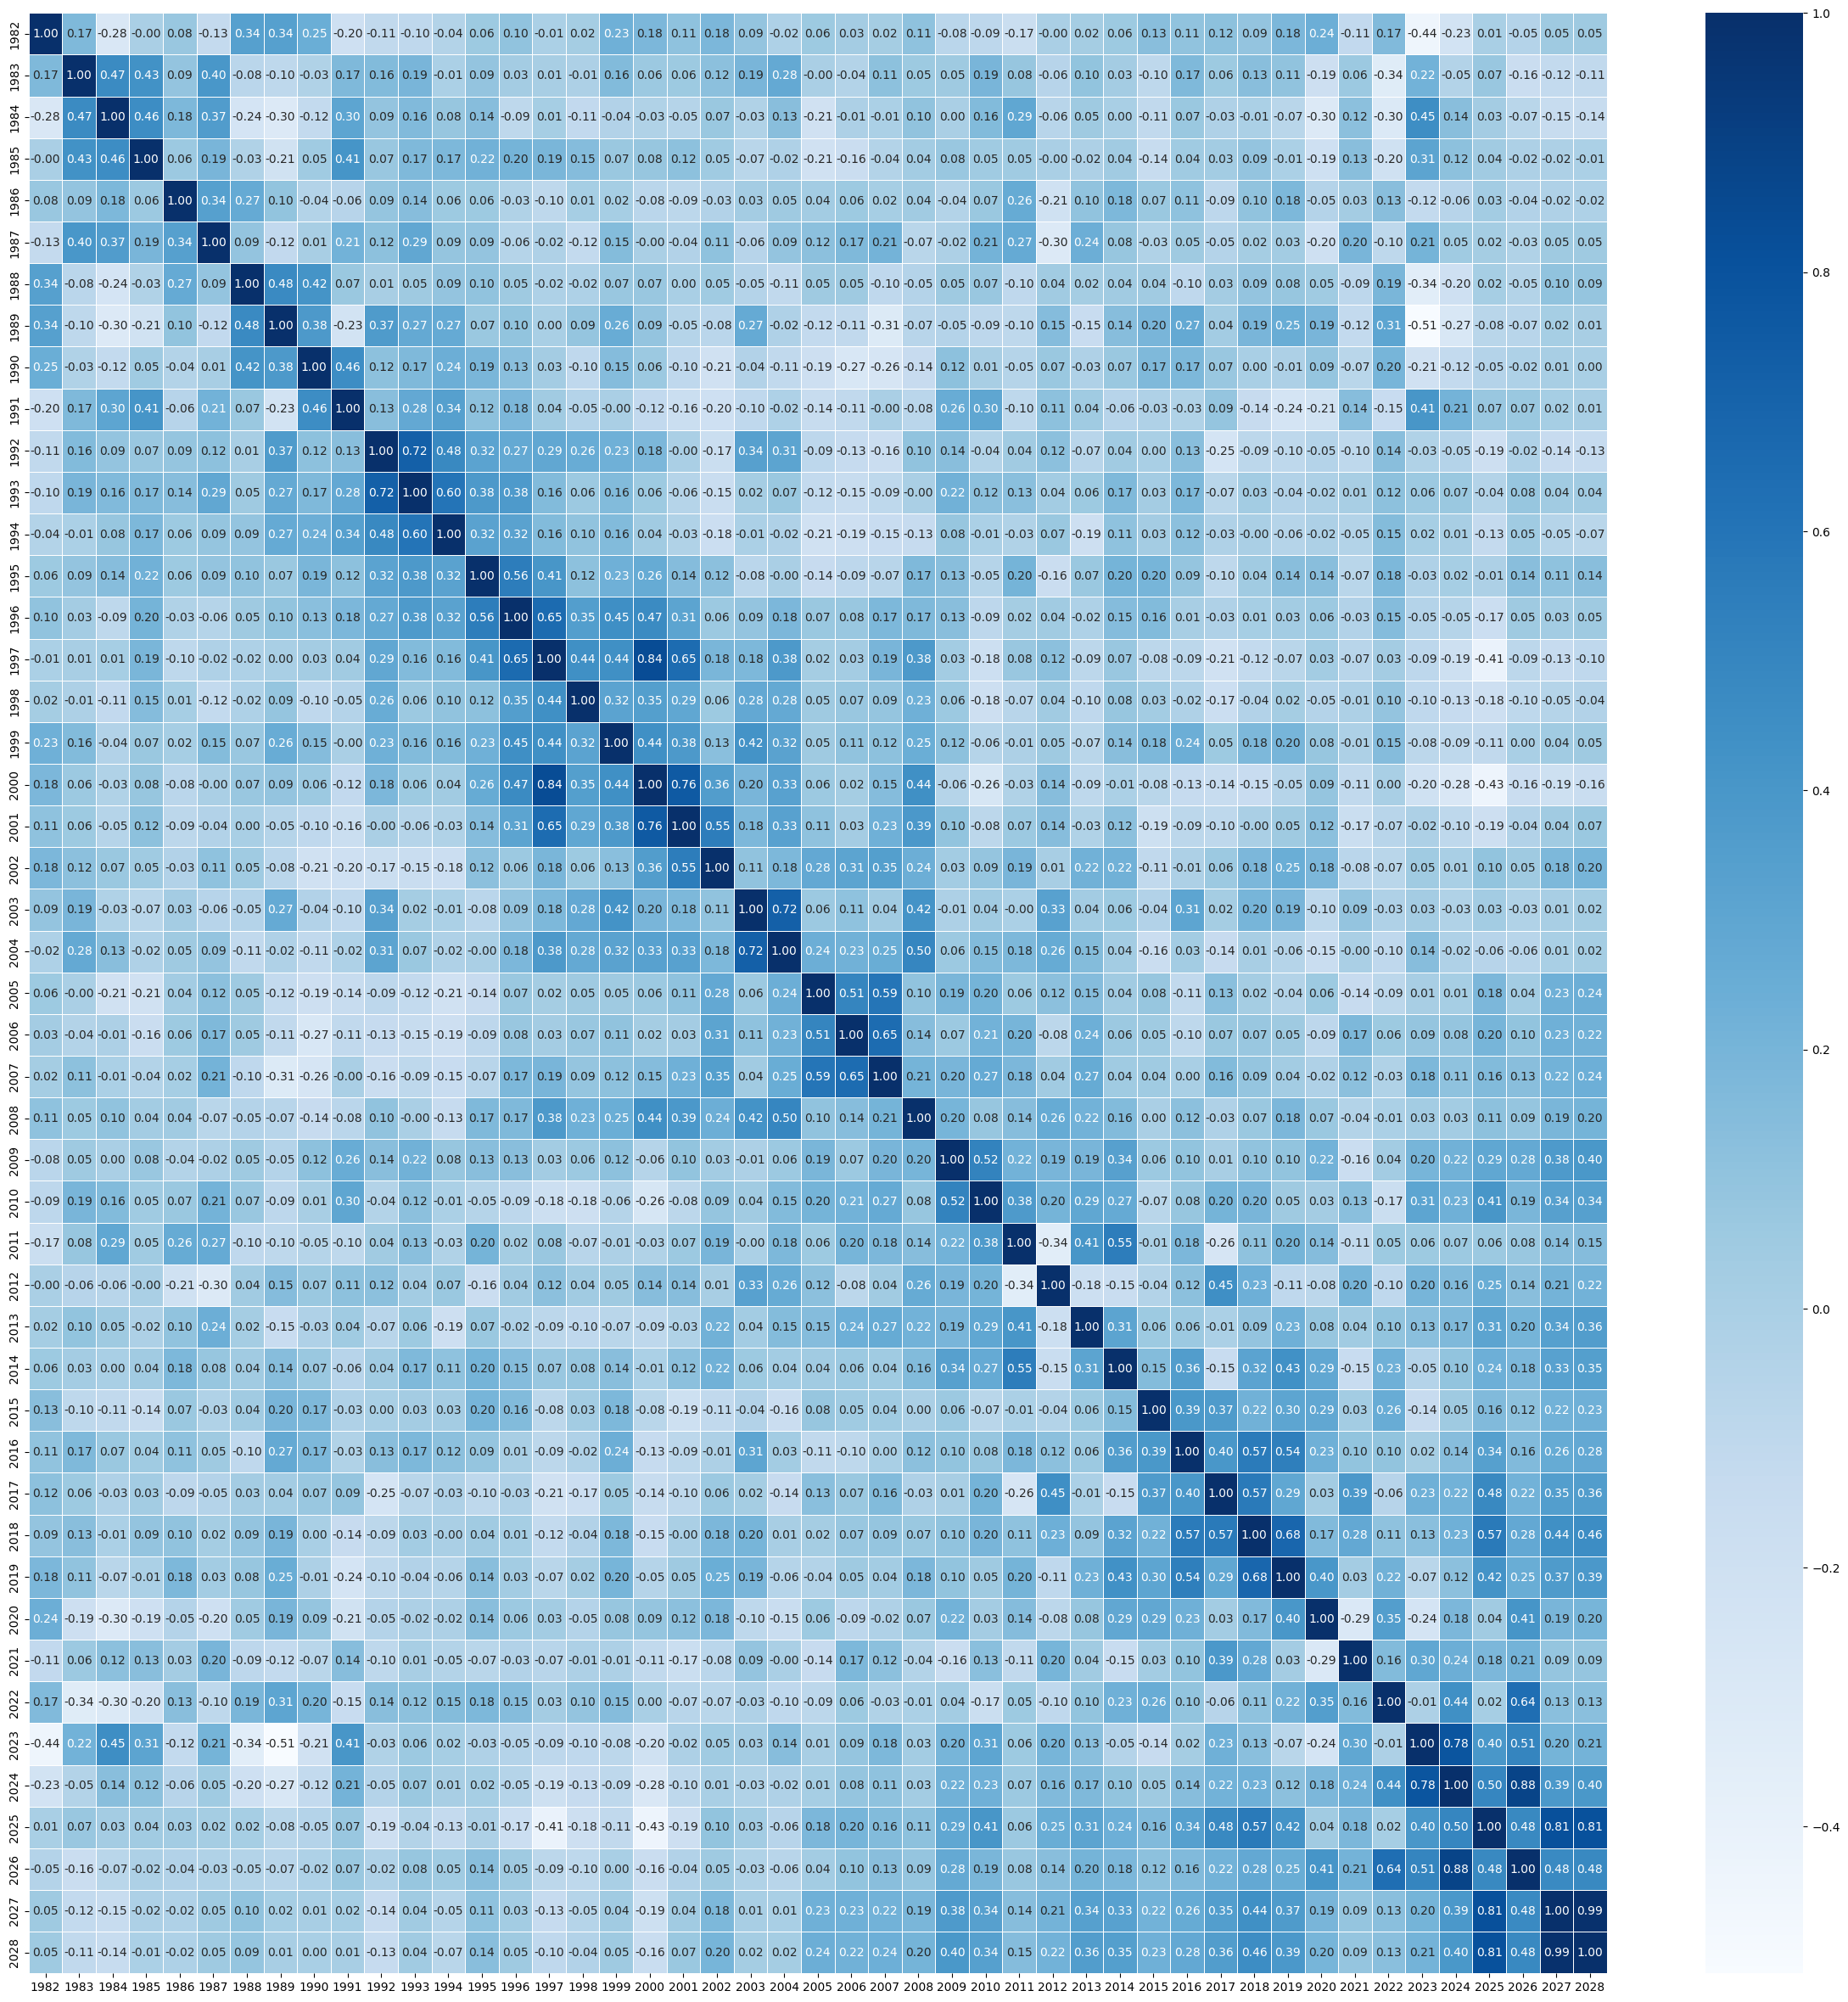

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data = data_impute.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

# 2.청소년건강행태 조사 2019

In [ ]:
sd = pd.read_csv('/content/drive/MyDrive/woori-numpy/dateset_230529/student_data.csv')
sd

,성별,연령,키,몸무게,학업성적,경제상태,건강인지,운동일수,스트레스인지,피로회복정도,음주경험,흡연경험,주중_인터넷이용시간,주말_인터넷이용시간
0,2,13.0,154.0,50.0,2,2,1,4,3,4,1,1,120.0,180.0
1,2,12.0,161.0,47.0,1,1,1,6,2,2,1,1,120.0,60.0
2,2,13.0,161.0,44.3,2,2,2,5,2,3,1,1,120.0,180.0
3,2,13.0,163.7,52.0,1,2,1,8,2,3,2,1,0.0,0.0
4,2,13.0,156.0,44.0,3,2,1,8,3,2,1,1,20.0,0.0
5,2,13.0,166.7,62.0,2,3,2,3,2,4,1,1,120.0,240.0
6,2,12.0,169.0,45.4,4,2,2,1,3,3,1,1,NaN,600.0
7,2,NaN,157.0,42.0,1,1,1,7,5,1,1,1,120.0,120.0
8,1,12.0,155.0,NaN,2,1,2,4,5,1,1,1,120.0,0.0
9,1,13.0,NaN,54.0,1,1,1,8,3,3,1,1,90.0,180.0


In [ ]:
sd1 =sd[['성별', '키', '몸무게', '주중_인터넷이용시간','주말_인터넷이용시간']]
sd1

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
0,2,154.0,50.0,120.0,180.0
1,2,161.0,47.0,120.0,60.0
2,2,161.0,44.3,120.0,180.0
3,2,163.7,52.0,0.0,0.0
4,2,156.0,44.0,20.0,0.0
5,2,166.7,62.0,120.0,240.0
6,2,169.0,45.4,NaN,600.0
7,2,157.0,42.0,120.0,120.0
8,1,155.0,NaN,120.0,0.0
9,1,NaN,54.0,90.0,180.0


In [ ]:
sd1.corr()

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
성별,1.000000,-0.464063,-0.462323,-0.375413,0.089661
키,-0.464063,1.000000,0.702865,0.042456,0.221947
몸무게,-0.462323,0.702865,1.000000,0.074886,-0.006871
주중_인터넷이용시간,-0.375413,0.042456,0.074886,1.000000,0.613367
주말_인터넷이용시간,0.089661,0.221947,-0.006871,0.613367,1.000000


In [ ]:
print(sd1.isnull().sum())

성별            0
키             6
몸무게           4
주중_인터넷이용시간    2
주말_인터넷이용시간    2
dtype: int64


In [ ]:
sd1.describe()

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
count,29.000000,23.000000,25.000000,27.000000,27.000000
mean,1.517241,162.986957,52.896000,105.555556,119.629630
std,0.508548,6.739592,10.666438,90.991687,131.777244
min,1.000000,154.000000,39.000000,0.000000,0.000000
25%,1.000000,157.000000,46.000000,25.000000,15.000000
50%,2.000000,161.300000,50.600000,120.000000,120.000000
75%,2.000000,167.850000,57.000000,135.000000,180.000000
max,2.000000,178.000000,77.000000,360.000000,600.000000


In [ ]:
sd1.mean()

성별              1.517241
키             162.986957
몸무게            52.896000
주중_인터넷이용시간    105.555556
주말_인터넷이용시간    119.629630
dtype: float64

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  func(*a

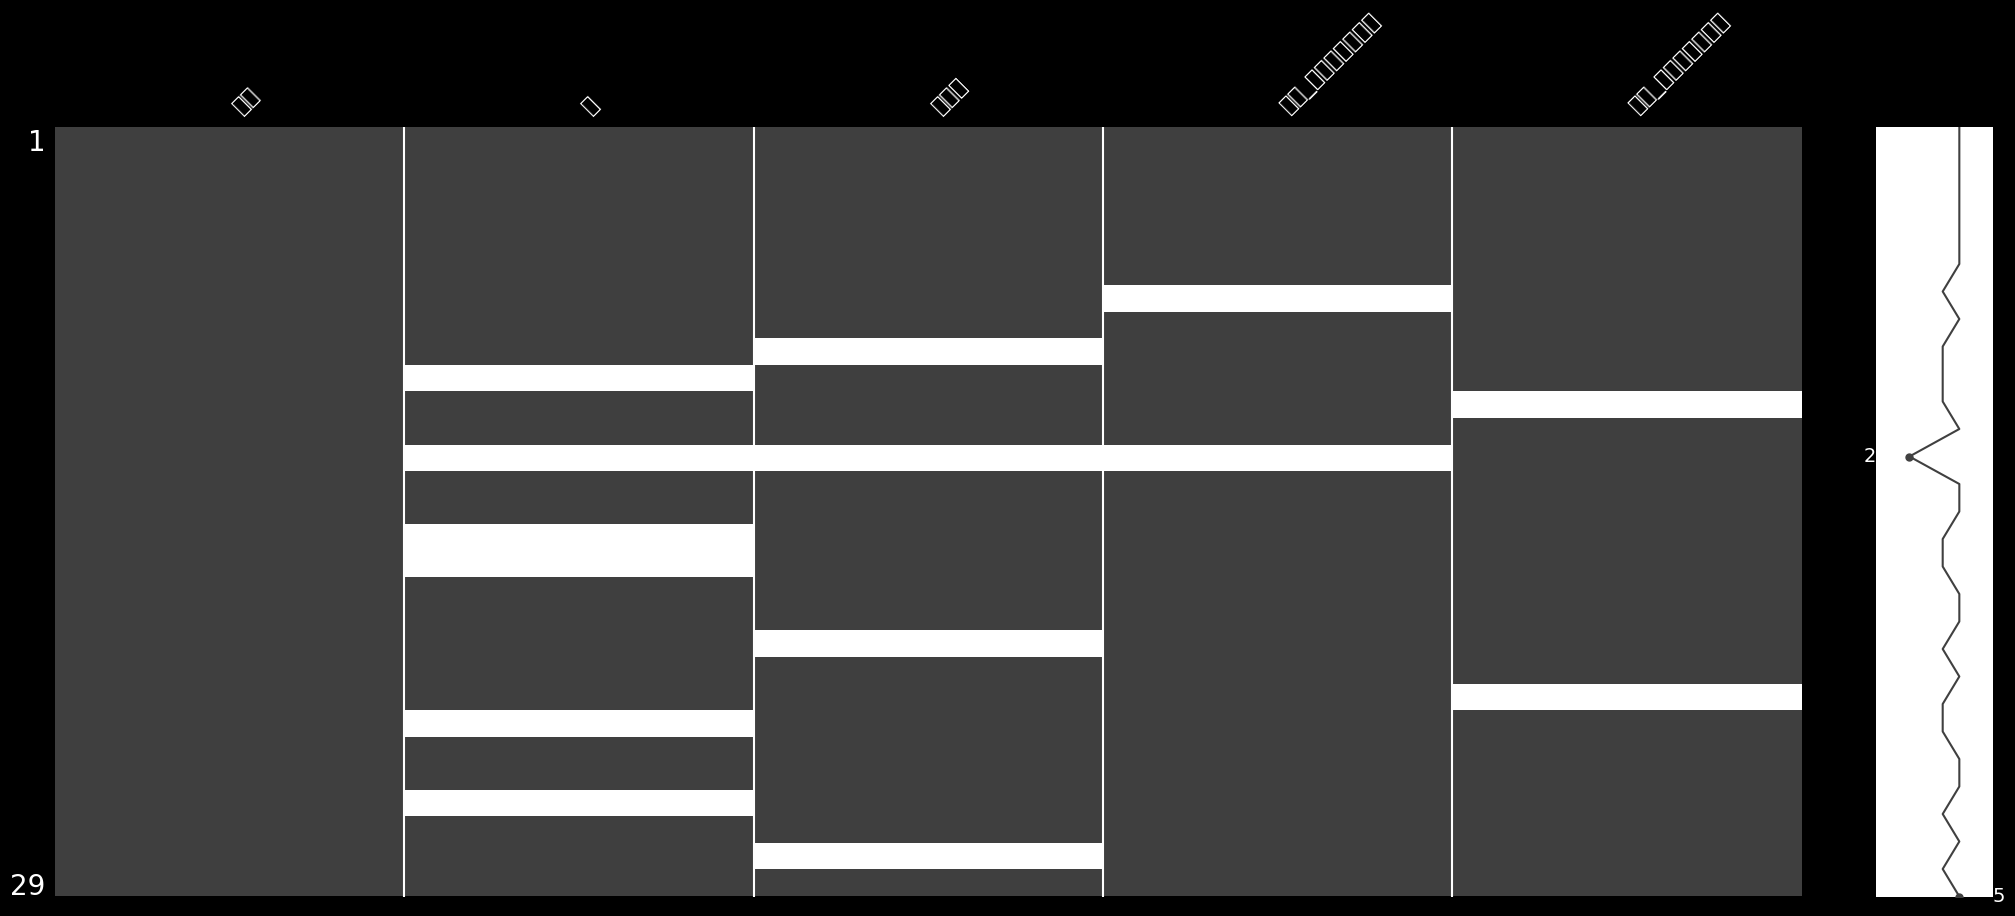

In [ ]:
#결측치 현황 파악
msno.matrix(sd1)

In [ ]:
# fir_transform은 imputer를 켜고 변환된 데이터의 값 을 반환합니다 #random_state 사용할 의사 난수 생성기의 시드
sd1_impute = pd.DataFrame(IterativeImputer(random_state=1234).fit_transform(sd1))
# data_impute.columns = df.columns
# data_impute.head()
# data = df_impute

In [ ]:
sd1_impute.columns = sd1.columns #

In [ ]:
sd1_impute.tail() #변환된 데이터 값 중 하위5개

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
24,2.0,160.300000,46.00000,0.0,10.0
25,1.0,161.106257,51.00000,30.0,20.0
26,1.0,169.000000,75.00000,360.0,240.0
27,2.0,155.000000,43.61819,60.0,120.0
28,1.0,174.500000,76.00000,40.0,60.0


In [ ]:
sd2 = sd1_impute

In [ ]:
sd2.tail() #결측값을 채운 수정본 중 하위 5개

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
24,2.0,160.300000,46.00000,0.0,10.0
25,1.0,161.106257,51.00000,30.0,20.0
26,1.0,169.000000,75.00000,360.0,240.0
27,2.0,155.000000,43.61819,60.0,120.0
28,1.0,174.500000,76.00000,40.0,60.0


In [ ]:
sd2.tail() #결측값이 있는 원본 중 하위 5개

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
24,2.0,160.300000,46.00000,0.0,10.0
25,1.0,161.106257,51.00000,30.0,20.0
26,1.0,169.000000,75.00000,360.0,240.0
27,2.0,155.000000,43.61819,60.0,120.0
28,1.0,174.500000,76.00000,40.0,60.0


In [ ]:
sd1 #결측값이 있는 원본

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
0,2,154.0,50.0,120.0,180.0
1,2,161.0,47.0,120.0,60.0
2,2,161.0,44.3,120.0,180.0
3,2,163.7,52.0,0.0,0.0
4,2,156.0,44.0,20.0,0.0
5,2,166.7,62.0,120.0,240.0
6,2,169.0,45.4,NaN,600.0
7,2,157.0,42.0,120.0,120.0
8,1,155.0,NaN,120.0,0.0
9,1,NaN,54.0,90.0,180.0


In [ ]:
sd2 #결측값을 채운 수정본

,성별,키,몸무게,주중_인터넷이용시간,주말_인터넷이용시간
0,2.0,154.000000,50.000000,120.000000,180.000000
1,2.0,161.000000,47.000000,120.000000,60.000000
2,2.0,161.000000,44.300000,120.000000,180.000000
3,2.0,163.700000,52.000000,0.000000,0.000000
4,2.0,156.000000,44.000000,20.000000,0.000000
5,2.0,166.700000,62.000000,120.000000,240.000000
6,2.0,169.000000,45.400000,390.202434,600.000000
7,2.0,157.000000,42.000000,120.000000,120.000000
8,1.0,155.000000,44.966949,120.000000,0.000000
9,1.0,163.983438,54.000000,90.000000,180.000000


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  func(*a

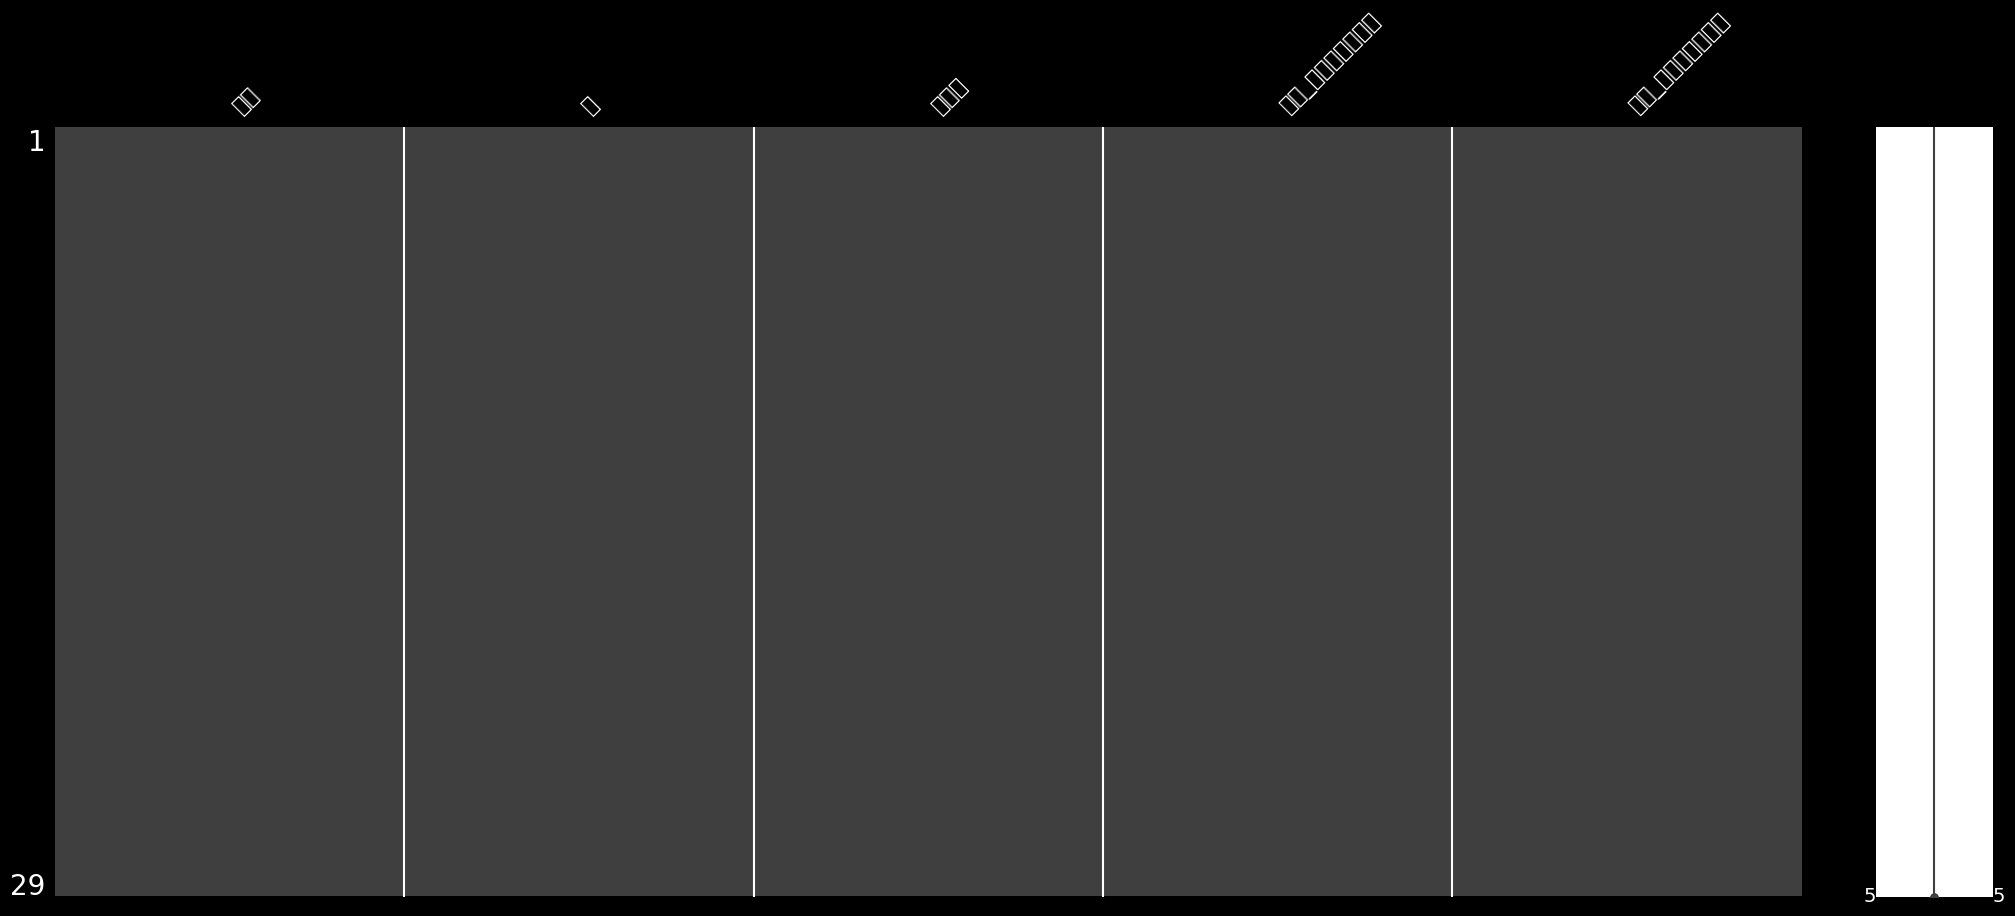

In [ ]:
msno.matrix(sd2) #결측치 시각화 확인

<Axes: >

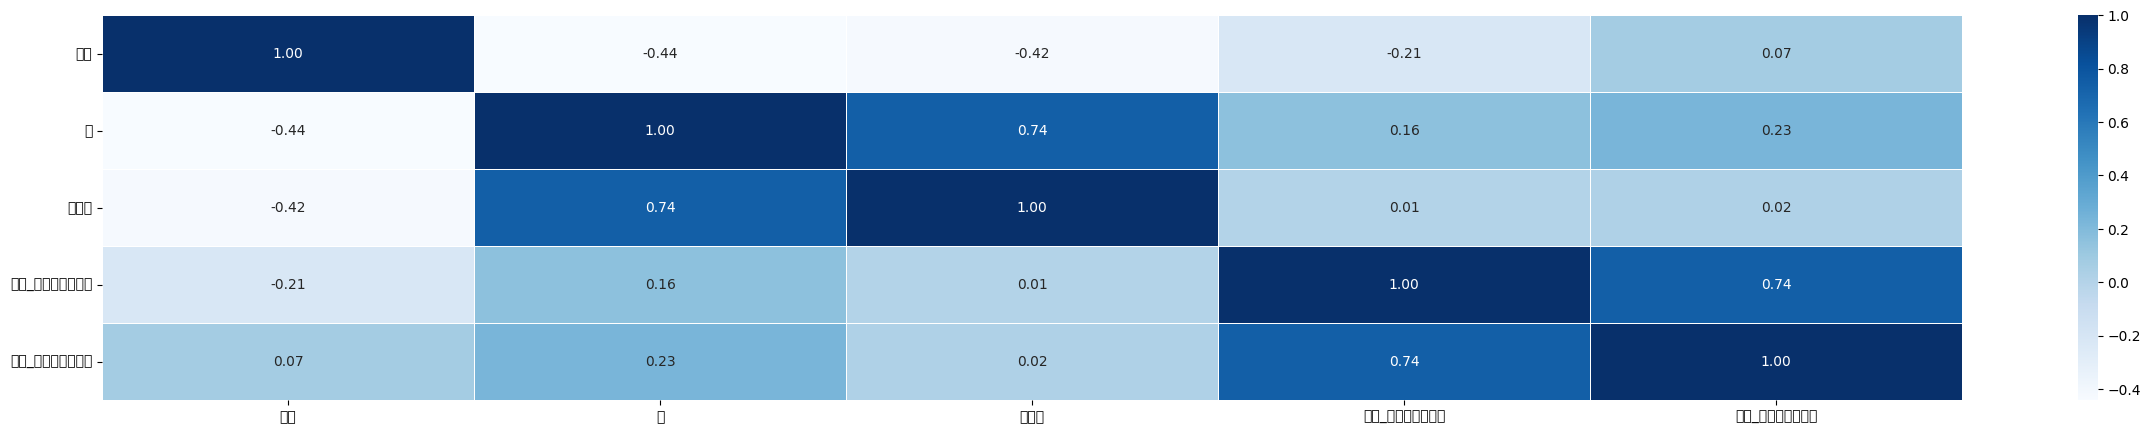

In [ ]:
plt.figure(figsize=(30,5))
sns.heatmap(data = sd2.corr(), annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues')

# 3. 신용점수예측

> **데이터 살펴보기**

* 신용점수와 고객 프로필 정보
* 데이터 명세 ⬇

|Loan ID|Customer ID|Loan Status|Current Loan Amount|Term|Credit Score|
|:---:|:---:|:---:|:---:|:---:|:---:|
|대출ID|고객ID|대출상태|현재대출잔액|대출기간|신용점수|
|Annual Income|Years in current job|Home Ownership|Purpose|Monthly Debt|Years of Credit History|
|연수입|직업년차|자가여부|대출목적|월상환금액|신용기록|
|Months since last delinquent|Number of Open Accounts|Number of Credit Problems|Current Credit Balance|Maximum Open Credit|Bankruptcies|  
|마지막 연체이후 개월|유효계좌수|신용불량건수|현재신용한도|최대신용한도|파산여부|
|Tax Liens|
|세금유치권|

In [ ]:
crs = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/woori-numpy/dateset_230529/신용점수예측/credit_score.csv'))
crs

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
crs.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
print(crs.isnull().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


In [ ]:
crs.drop(crs[crs.isnull().sum(axis=1)/crs.shape[1]==1].index, inplace=True)
crs

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [ ]:
print('전체 데이터 건수:', len(crs))

전체 데이터 건수: 64055


In [ ]:
crs.shape

(64055, 19)

<Axes: >

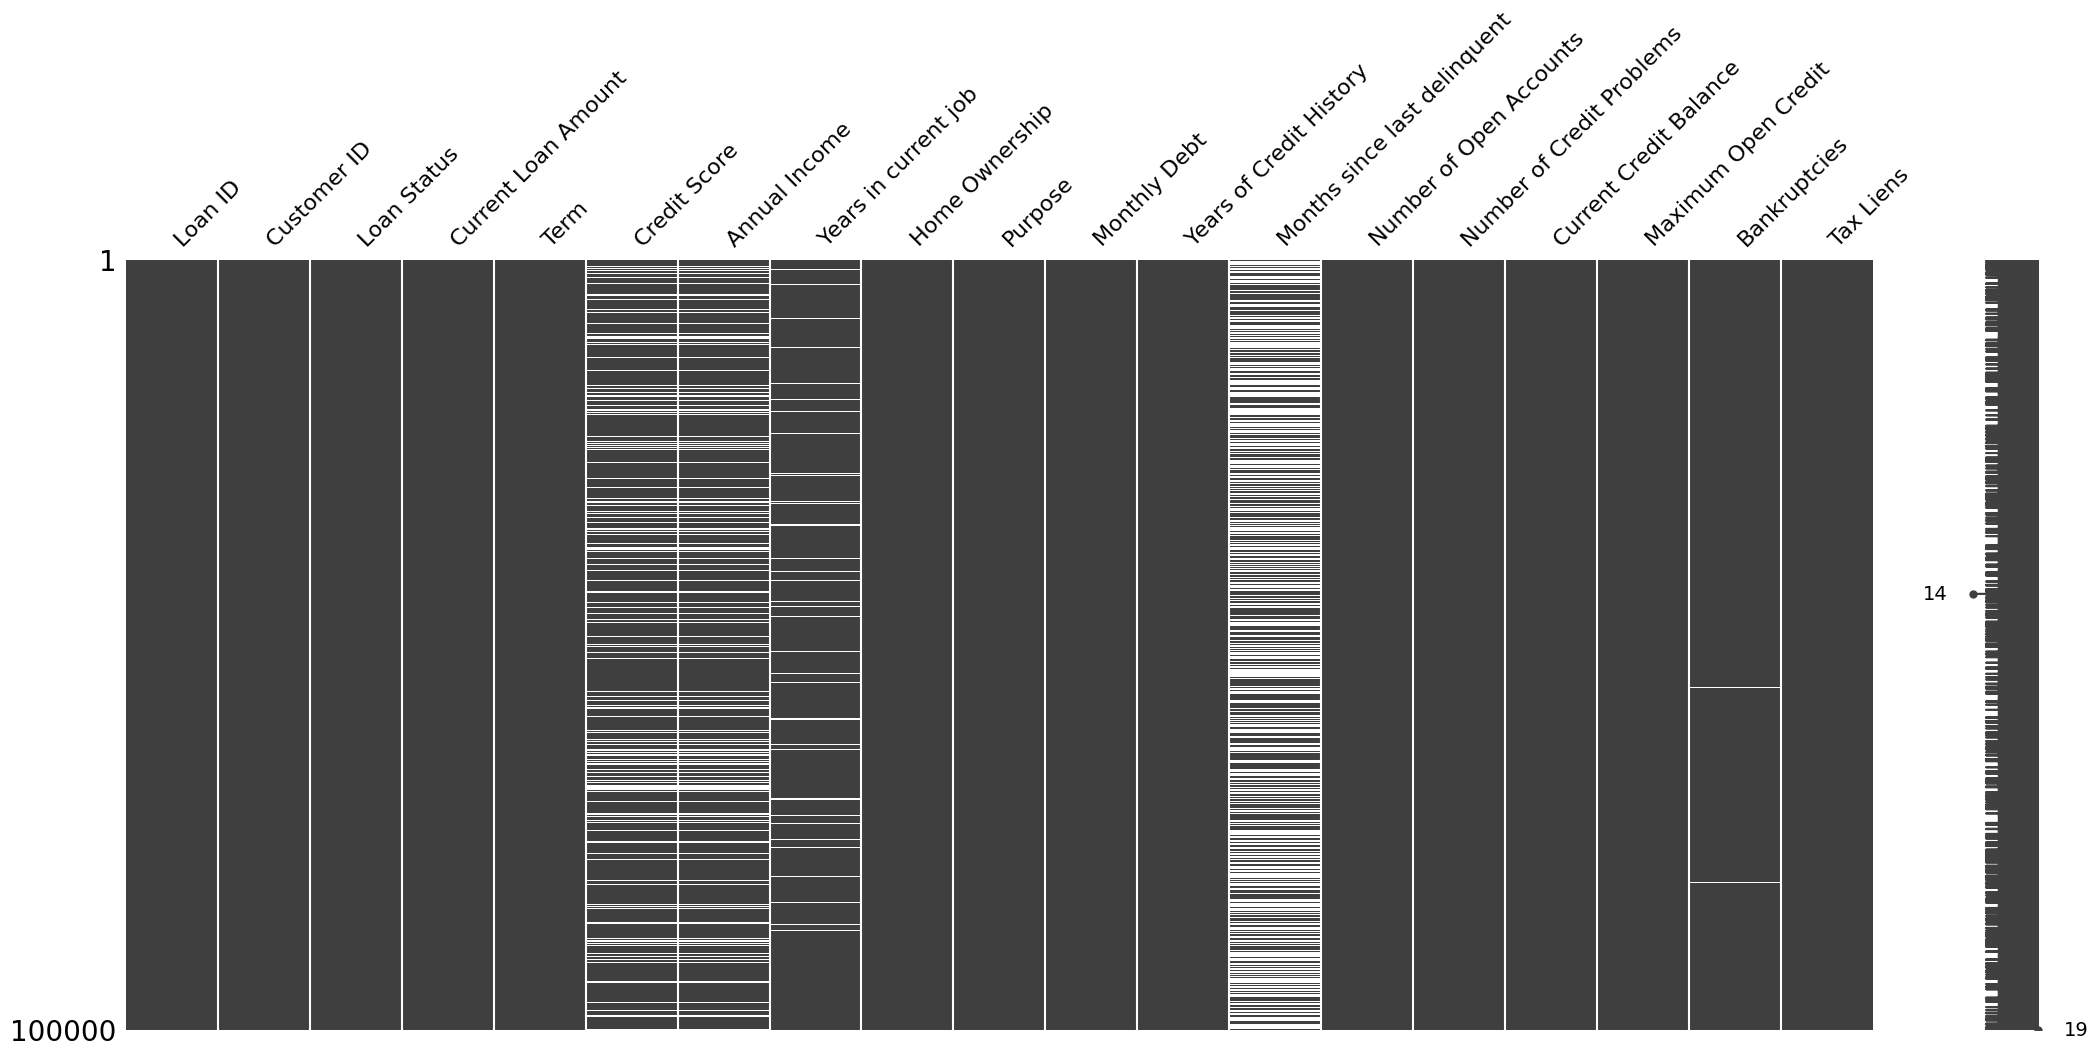

In [ ]:
#결측치 현황 파악
msno.matrix(crs)

In [ ]:
#고객 ID 기준 중복 확인
crs[crs['Customer ID']=='981165ec-3274-42f5-a3b4-d104041a9ca9']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
38854,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


In [ ]:
# 고객 ID 기준 중복 제거
crs.drop_duplicates(['Customer ID'], keep = 'first', inplace=True)

In [ ]:
crs.shape

(81999, 19)

In [ ]:
crs

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Customer ID,,,,,,,,,,,,,,,,,
981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0


In [ ]:
crs.set_index('Loan ID', inplace=True)

In [ ]:
crs.set_index('Customer ID', inplace=True)

KeyError: ignored

In [ ]:
crs

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Customer ID,,,,,,,,,,,,,,,,,
981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0


In [ ]:
# crs_impute = (pd.DataFrame(IterativeImputer(fit_transform(crs))))
# data_impute
crs_impute = IterativeImputer(random_state=83)
# # fir_transform은 imputer를 켜고 변환된 데이터의 값 을 반환합니다 #random_state 사용할 의사 난수 생성기의 시드
# data_impute.columns = df2.columns
# data_impute.head()
# data = df_impute

In [ ]:
crs.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

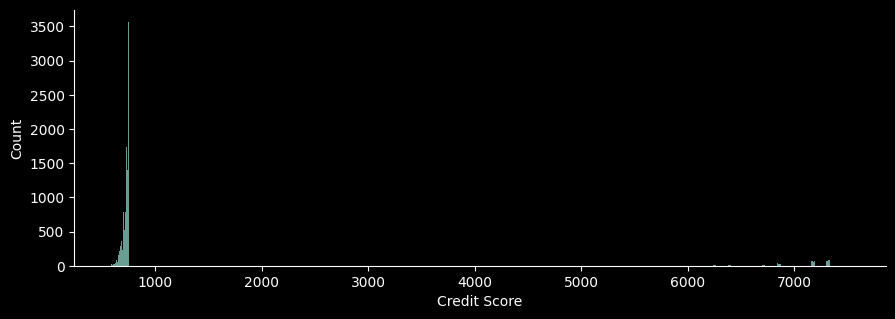

In [ ]:
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(crs['Credit Score'])
plt.gcf().set_size_inches(10, 3)

In [ ]:
crs['Credit Score'].describe()

count    64968.000000
mean      1168.410741
std       1632.676553
min        585.000000
25%        711.000000
50%        731.000000
75%        743.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [ ]:
# 신용점수가 1,000점 만점으로 가정했을때, 그 이상의 데이터는 오류가 있는 Data일 확률이 높다. 제거한다.
crs = crs[crs['Credit Score']<=1000]
crs.shape

(60417, 17)

<ipython-input-68-45c1f4927a61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crs['Credit Score'])


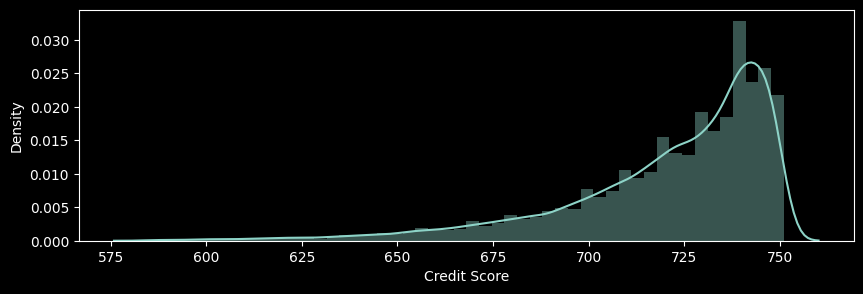

In [ ]:
sns.distplot(crs['Credit Score'])
plt.gcf().set_size_inches(10, 3)